In [ ]:
import sklearn
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train = [[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1],
           [1, 0, 0], [1, 0, 0], [1, 1, 0], [1, 0, 1],
           [1, 1, 0], [1, 1, 0]]
y_train = ['+', '+', '+', '-', '+', '+', '-', '+', '-', '-']

# Define the validation set
X_valid = [[0, 0, 0], [0, 1, 1], [1, 1, 0], [1, 0, 1], [1, 0, 0]]
y_valid = ['+', '+', '-', '-', '+']

tree = DecisionTreeClassifier(random_state = 0)
tree = tree.fit(X_train, y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_valid)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_valid, y_test_pred)

print(f'Decision tree train/valid accuracies: {tree_test:.3f}')

Decision tree train/valid accuracies: 0.600


Round 1: Train accuracy = 1.000, Valid accuracy = 0.600
Tree 1 in Round 1:


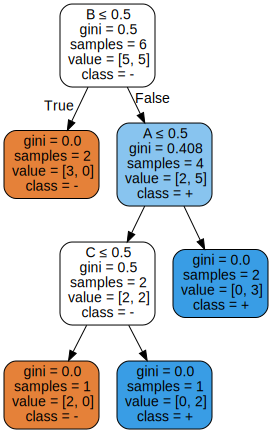

Round 2: Train accuracy = 1.000, Valid accuracy = 0.600
Tree 1 in Round 2:


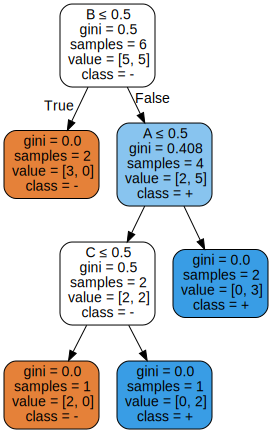

Tree 2 in Round 2:


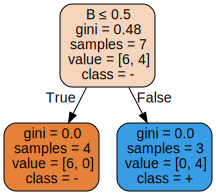

Round 3: Train accuracy = 0.900, Valid accuracy = 0.600
Tree 1 in Round 3:


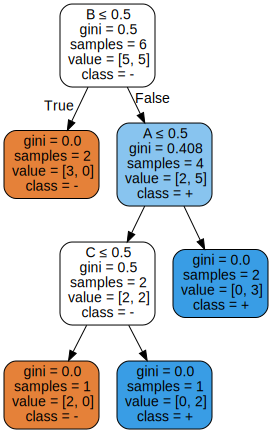

Tree 2 in Round 3:


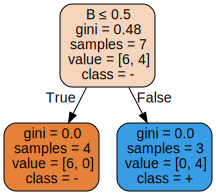

Tree 3 in Round 3:


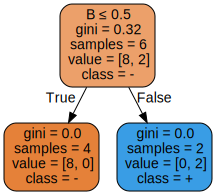

Round 4: Train accuracy = 0.900, Valid accuracy = 0.600
Tree 1 in Round 4:


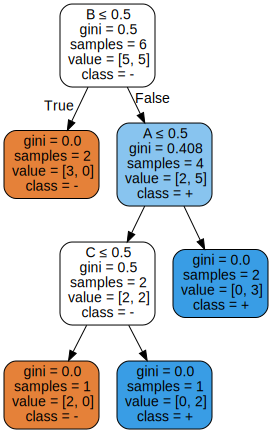

Tree 2 in Round 4:


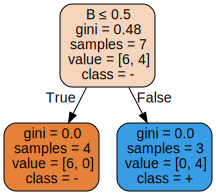

Tree 3 in Round 4:


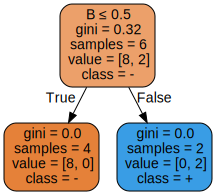

Tree 4 in Round 4:


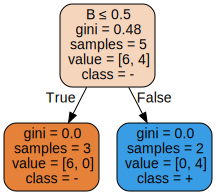

Round 5: Train accuracy = 0.900, Valid accuracy = 0.600
Tree 1 in Round 5:


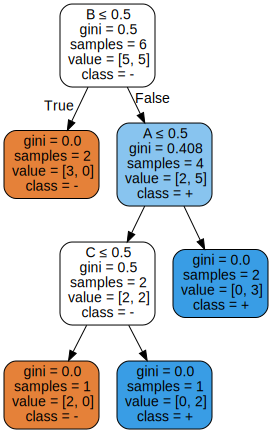

Tree 2 in Round 5:


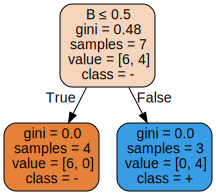

Tree 3 in Round 5:


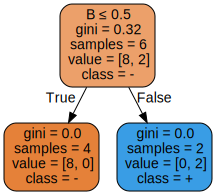

Tree 4 in Round 5:


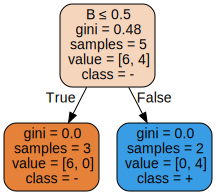

Tree 5 in Round 5:


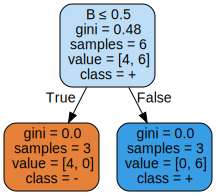

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.tree import export_graphviz
from IPython.display import display
import graphviz
from sklearn.model_selection import GridSearchCV


X_train = [[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1],
           [1, 0, 0], [1, 0, 0], [1, 1, 0], [1, 0, 1],
           [1, 1, 0], [1, 1, 0]]
y_train = ['+', '+', '+', '-', '+', '+', '-', '+', '-', '-']

# Define the validation set
X_valid = [[0, 0, 0], [0, 1, 1], [1, 1, 0], [1, 0, 1], [1, 0, 0]]
y_valid = ['+', '+', '-', '-', '+']

n_estimators = 5 # Number of base classifiers or bagging rounds

for i in range(n_estimators):
    tree = DecisionTreeClassifier(random_state=0)
    bagging = BaggingClassifier(estimator=tree, n_estimators=i+1, random_state=0)
    bagging.fit(X_train, y_train)
    y_train_pred = bagging.predict(X_train)
    y_valid_pred = bagging.predict(X_valid)
    train_acc = accuracy_score(y_train, y_train_pred)
    valid_acc = accuracy_score(y_valid, y_valid_pred)
    print(f'Round {i+1}: Train accuracy = {train_acc:.3f}, Valid accuracy = {valid_acc:.3f}')
    for j, tree_in_round in enumerate(bagging.estimators_):
        print(f'Tree {j+1} in Round {i+1}:')
        dot_data = export_graphviz(tree_in_round, out_file=None,
                                   feature_names=['A', 'B', 'C'], 
                                   class_names=['-', '+'],
                                   filled=True, rounded=True,
                                   special_characters=True)
        graph = graphviz.Source(dot_data)
        display(graph)